# Introduction
Though users can automatically run the whole Quant research worklfow based on configurations with Qlib.

Some advanced users usally would like to carefully customize each component to explore more in Quant.

If you just want a simple example of Qlib. [Quick start](https://github.com/microsoft/qlib#quick-start) and [workflow_by_code](https://github.com/microsoft/qlib/blob/main/examples/workflow_by_code.ipynb) may be a better choice for you.

If you want to know more details about Quant research, this notebook may be a better place for you to start.

We hope this script could be a tutorial for users who are interested in the details of Quant.

This notebook tries to demonstrate how can we use Qlib to build components step by step. 

In [1]:
from pprint import pprint
from pathlib import Path
import pandas as pd
from kan import *

In [2]:
MARKET = "csi300"
BENCHMARK = "SH000300"
EXP_NAME = "tutorial_exp"

In [3]:
import qlib
provider_uri = "D:\qlib_data\qlib_cn"  # target_dir
qlib.init(provider_uri=provider_uri)

[7016:MainThread](2024-05-29 15:11:01,806) INFO - qlib.Initialization - [config.py:426] - default_conf: client.
[7016:MainThread](2024-05-29 15:11:02,327) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[7016:MainThread](2024-05-29 15:11:02,328) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': WindowsPath('D:/qlib_data/qlib_cn')}


In [84]:
import datetime 

dh_handler = {'class': 'DatasetH',
 'module_path': 'qlib.data.dataset',
 'kwargs': {'handler': {'class': 'Alpha360',
   'module_path': 'qlib.contrib.data.handler',
   'kwargs': {'start_time': datetime.date(2019, 1, 1),
    'end_time': datetime.date(2023, 12, 31),
    'fit_start_time': datetime.date(2019, 1, 1),
    'fit_end_time': datetime.date(2023, 12, 31),
    'instruments': 'csi300',
    'infer_processors': [{'class': 'FilterCol',
      'kwargs': {'fields_group': 'feature',
       'col_list': [
        'VWAP0',
           'HIGH0',
           'OPEN0',
           'LOW0',
           'CLOSE1',
           'VOLUME1',
]}},
     {'class': 'CSRankNorm', 'kwargs': {'fields_group': 'feature'}},
     {'class': 'Fillna',
      'kwargs': {'fields_group': 'feature', }}],
    'learn_processors': [{'class': 'DropnaLabel'},
     {'class': 'CSRankNorm', 'kwargs': {'fields_group': 'label'}}],
    'label': ['Ref($close, -5) / Ref($close, -1) - 1']}},
  'segments': {'train': [datetime.date(2019, 1, 1),
    datetime.date(2019, 12, 31)],
   'valid': [datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)],
   'test': [datetime.date(2021, 1, 1), datetime.date(2023, 3, 1)]},}}

In [85]:
from qlib.utils import init_instance_by_config

In [86]:
hd = init_instance_by_config(dh_handler['kwargs']['handler'])

[21192:MainThread](2024-05-03 15:36:11,399) INFO - qlib.timer - [log.py:127] - Time cost: 107.870s | Loading data Done
[21192:MainThread](2024-05-03 15:36:11,603) INFO - qlib.timer - [log.py:127] - Time cost: 0.004s | FilterCol Done
D:\work\qlib_main\quant-ml-qlib\qlib\data\dataset\processor.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = t
[21192:MainThread](2024-05-03 15:36:11,930) INFO - qlib.timer - [log.py:127] - Time cost: 0.326s | CSRankNorm Done
[21192:MainThread](2024-05-03 15:36:11,946) INFO - qlib.timer - [log.py:127] - Time cost: 0.015s | Fillna Done
[21192:MainThread](2024-05-03 15:36:11,964) INFO - qlib.timer - [log.py:127] - Time cost: 0.005s | DropnaLabel Done
[21192:MainThread](2024-05-03 15:36:12,025) INFO - qli

This dataset has the same structure as the simple one with 1 column  we created just now.

In [87]:
df = hd.fetch()

In [88]:
df

CLOSE1     OPEN0     HIGH0      LOW0     VWAP0  \
datetime   instrument                                                     
2019-01-02 SH600000    0.088394 -0.707153 -0.883942 -0.745036 -1.136496   
           SH600009   -0.214672 -0.669270 -1.224891 -0.858686 -0.972336   
           SH600010   -0.227299 -0.340949 -0.441971  0.328321 -0.025255   
           SH600015    0.164161  0.075766 -0.631387 -0.340949 -0.631387   
           SH600016    0.366204  0.063139 -0.416715  0.164161 -0.770292   
...                         ...       ...       ...       ...       ...   
2023-12-29 SZ300896    1.693060  1.668434  1.569929  0.560249 -0.905018   
           SZ300919   -0.720320 -0.831139 -0.905018 -0.806512 -1.631495   
           SZ300957    1.175907  0.215480  0.794199  0.387865 -0.190854   
           SZ300979   -0.671068 -1.040463  0.634128 -0.744947  0.892705   
           SZ300999    0.621815  0.634128 -0.437117  0.794199  0.646441   

                        VOLUME1  Ref($close, -5) / Ref($close, -1) - 1  
datetime   instrument                                                   
2019-01-02 SH600000    0.277810                               0.018353  
           SH600009    1.452190                               0.019876  
           SH600010    0.896569                               0.012966  
           SH600015    0.391460                               0.013690  
           SH600016    1.275401                               0.015896  
...                         ...                                    ...  
2023-12-29 SZ300896    1.643808                              -0.010070  
           SZ300919    0.868078                              -0.044512  
           SZ300957    1.680747                              -0.034938  
           SZ300979   -0.535623                              -0.027072  
           SZ300999    0.449431                              -0.053003  

[338677 rows x 7 columns]

In [89]:
hd.data_loader

#### some details

The training data may not be the same as the test data.

e.g.
- the training dataset and test dataset use a different fitlering rules,  data processing

In [91]:
hd.learn_processors

In [92]:
hd.infer_processors

In [93]:
hd.process_type  # appending type

'append'

In [94]:
dataset_conf = {
    "class": "DatasetH",
    "module_path": "qlib.data.dataset",
    "kwargs": {
        "handler": hd,
        "segments": {
            "train": ("2019-01-01", "2019-12-31"),
            "valid": ("2020-01-01", "2020-12-31"),
            "test": ("2021-01-01", "2023-12-31"),
        },
    },
}

In [95]:
dataset = init_instance_by_config(dataset_conf)

In [96]:
GPU=0
device = torch.device("cuda:%d" % (GPU) if torch.cuda.is_available() and GPU >= 0 else "cpu")
device = 'cpu'

In [97]:
device

'cpu'

In [98]:
kan_dataset = {}
kan_dataset['train_input'] = torch.Tensor(dataset.prepare('train', col_set='feature').values).to(device)
kan_dataset['train_label'] = torch.Tensor(dataset.prepare('train', col_set='label').values).to(device)

kan_dataset['test_input'] = torch.Tensor(dataset.prepare('valid', col_set='feature').values).to(device)
kan_dataset['test_label'] = torch.Tensor(dataset.prepare('valid', col_set='label').values).to(device)

In [99]:
dataset.prepare('train', col_set='feature')

CLOSE1     OPEN0     HIGH0      LOW0     VWAP0  \
datetime   instrument                                                     
2019-01-02 SH600000    0.088394 -0.707153 -0.883942 -0.745036 -1.136496   
           SH600009   -0.214672 -0.669270 -1.224891 -0.858686 -0.972336   
           SH600010   -0.227299 -0.340949 -0.441971  0.328321 -0.025255   
           SH600015    0.164161  0.075766 -0.631387 -0.340949 -0.631387   
           SH600016    0.366204  0.063139 -0.416715  0.164161 -0.770292   
...                         ...       ...       ...       ...       ...   
2019-12-31 SZ300347   -1.466739 -1.291232  0.112826 -1.115725  0.551594   
           SZ300408    1.579565  1.529420  1.579565  0.764710  1.504348   
           SZ300413   -0.438768 -0.413696  0.488913 -0.927681 -1.027971   
           SZ300433    0.137899  0.401159  0.476377 -0.814855 -0.338478   
           SZ300498   -0.702029 -0.789783  0.012536 -0.376087  0.990362   

                        VOLUME1  
datetime   instrument            
2019-01-02 SH600000    0.277810  
           SH600009    1.452190  
           SH600010    0.896569  
           SH600015    0.391460  
           SH600016    1.275401  
...                         ...  
2019-12-31 SZ300347   -1.378986  
           SZ300408    1.679855  
           SZ300413    1.078116  
           SZ300433    0.764710  
           SZ300498   -0.275797  

[67004 rows x 6 columns]

In [100]:
kan_dataset['train_input'].shape

torch.Size([67004, 6])

In [106]:
model = KAN(width=[6,20,1], grid=5, k=3, seed=0, device=device)
model.train(kan_dataset, opt="LBFGS", steps=5, lamb=0.01, lamb_entropy=10., device=device);

train loss: 6.42e-02 | test loss: 7.12e-02 | reg: 7.97e+01 : 100%|████| 5/5 [03:29<00:00, 41.91s/it]


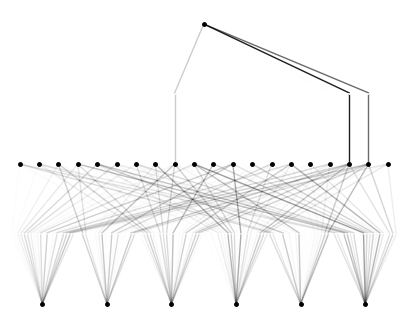

In [107]:
model.plot()

In [109]:
formula, variables = model.symbolic_formula()
# formula[0]

make sure all activations need to be converted to symbolic formulas first!


TypeError: cannot unpack non-iterable NoneType object

In [121]:
test_x = torch.Tensor(dataset.prepare('test', col_set='feature').values).to(device)

In [124]:
model_prune = copy(model)

TypeError: 'module' object is not callable

In [127]:
pred_y = model_prune(test_x)

In [146]:
test_y = dataset.prepare('test', col_set='label')

In [150]:
test_y_2021 = test_y[test_y.index.get_level_values(0) < '2021-12-31']

In [153]:
test_y_2021['predict'] = pred_y.detach().numpy()[:len(test_y_2021)]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21192\1142016167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_y_2021['predict'] = pred_y.detach().numpy()[:len(test_y_2021)]


In [154]:
ics = test_y_2021.groupby(level=0).apply(lambda x : x.corr(method='spearman').iloc[0,1])

<Axes: xlabel='datetime'>

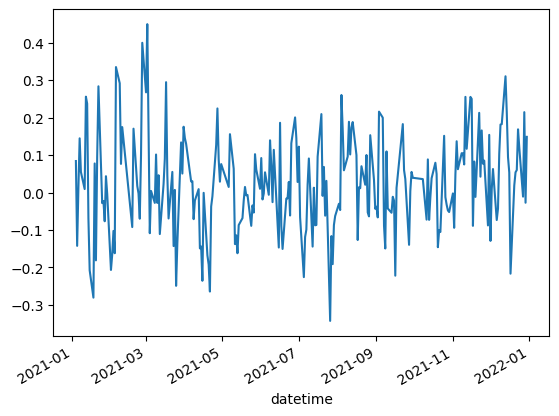

In [155]:
ics.plot()

In [156]:
ics.mean()

0.02321433303258352

# add symbolic function

In [142]:
SYMBOLIC_LIB.keys()

dict_keys(['x', 'x^2', 'x^3', 'x^4', '1/x', '1/x^2', '1/x^3', '1/x^4', 'sqrt', '1/sqrt(x)', 'exp', 'log', 'abs', 'sin', 'tan', 'tanh', 'sigmoid', 'sgn', 'arcsin', 'arctan', 'arctanh', '0', 'gaussian', 'cosh'])

In [143]:
add_symbolic('J0', torch.special.bessel_j0)

In [144]:
model.suggest_symbolic(0,0,0)

function , r2
gaussian , 0.9734076857566833
arctan , 0.9707499742507935
abs , 0.9704029560089111
sigmoid , 0.9691033363342285
tanh , 0.9691032767295837


('gaussian',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9734076857566833)